In [19]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.util import ngrams
from nltk import everygrams

# Import custom functions
from explore import *

In [20]:
# Import cleaned dataset
df = pd.read_csv('processed_data/clean_data.csv')

In [21]:
df.isna().sum()

Tweet                       1830
Years                          0
Lemmatized                  3220
Tweets with no Stopwords    6230
Short Tweets                6893
dtype: int64

In [22]:
len(df)

1048258

In [5]:
df.head(5)

,Tweet,Years,Tweet Length,Lemmatized,Tweets with no Stopwords,Short Tweets
0,oh man in like flynn what a crack up ...,2017,304,oh man in like flynn what a crack up #metoo #s...,oh man like flynn crack #metoo #sooriginal #ed...,man like flynn crack #metoo #sooriginal #edgy ...
1,ah no but i must admit ...,2017,375,ah no but i must admit #trumptrain #sweden htt...,ah must admit #trumptrain #sweden http co ckmy...,must admit #trumptrain #sweden http ckmynymtsk
2,most ...,2017,283,most like for #metoo http t co en lcew x,like #metoo http co en lcew x,like #metoo http lcew
3,...,2017,283,that be #awesome #maga #break #fridayfeeling #...,#awesome #maga #break #fridayfeeling #roymoore...,#awesome #maga #break #fridayfeeling #roymoore...
4,thank you ...,2017,306,thank you #metoo #silencebreakers https t co z...,thank #metoo #silencebreakers https co z xwbeocmk,thank #metoo #silencebreakers https xwbeocmk


In [26]:
new_df = df.dropna()

In [27]:
len(new_df)

1041365

In [31]:
new_df.isna().sum()

Tweet                       0
Years                       0
Lemmatized                  0
Tweets with no Stopwords    0
Short Tweets                0
dtype: int64

In [28]:
df_2017 = new_df.loc[df['Years'] == 2017]
len(df_2017)

286269

In [29]:
df_2018 = new_df.loc[df['Years'] == 2018]
len(df_2018)

638897

In [30]:
df_2019 = new_df.loc[df['Years'] == 2019]
len(df_2019)

116199

# Tokenization

In [32]:
# Replacing n't with not and modifying other features
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace("n't", "not")
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace("'ve", "")
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace("'re", "")
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace("wan na", "wanna")
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace("gon na", "gonna")
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace(" '", "")
df_2017['Short Tweets'] = df_2017['Short Tweets'].str.replace("' ", "")
df_2017.head()

,Tweet,Years,Lemmatized,Tweets with no Stopwords,Short Tweets
59965,ik zeg nee en je duwt gewoon je tong in mij...,2017,ik zeg nee en je duwt gewoon je tong in mijn m...,ik zeg nee en je duwt gewoon je tong mijn mond...,zeg nee duwt gewoon tong mijn mond waarom fran...
59966,she put alcohol in my mouth and made me go t...,2017,she put alcohol in my mouth and make me go to ...,put alcohol mouth make go bedroom #metoo http ...,put alcohol mouth make bedroom #metoo http iuv...
59967,heres something else that needs to end in ...,2017,here something else that need to end in as wel...,something else need end well fucking #metoo bu...,something else need end well fucking #metoo bu...
59968,in light of #metoo and all this i feel this...,2017,in light of #metoo and all this i feel this be...,light #metoo feel necessary unfounately happen...,light #metoo feel necessary unfounately happen...
59969,#metoo,2017,#metoo,#metoo,#metoo


In [34]:
# Apply tokenize function
df_2017['Tokenized'] = df_2017[df_2017['Short Tweets'].notna()]['Short Tweets'].apply(tokenize)

In [35]:
df_2017['Lemma Final Token'] = df_2017[df_2017['Lemmatized'].notna()]['Lemmatized'].apply(tokenize)

In [36]:
df_2017.head()

,Tweet,Years,Lemmatized,Tweets with no Stopwords,Short Tweets,Tokenized,Lemma Final Token
59965,ik zeg nee en je duwt gewoon je tong in mij...,2017,ik zeg nee en je duwt gewoon je tong in mijn m...,ik zeg nee en je duwt gewoon je tong mijn mond...,zeg nee duwt gewoon tong mijn mond waarom fran...,"[zeg, nee, duwt, gewoon, tong, mijn, mond, waa...","[ik, zeg, nee, en, je, duwt, gewoon, je, tong,..."
59966,she put alcohol in my mouth and made me go t...,2017,she put alcohol in my mouth and make me go to ...,put alcohol mouth make go bedroom #metoo http ...,put alcohol mouth make bedroom #metoo http iuv...,"[put, alcohol, mouth, make, bedroom, #metoo, h...","[she, put, alcohol, in, my, mouth, and, make, ..."
59967,heres something else that needs to end in ...,2017,here something else that need to end in as wel...,something else need end well fucking #metoo bu...,something else need end well fucking #metoo bu...,"[something, else, need, end, well, fucking, #m...","[here, something, else, that, need, to, end, i..."
59968,in light of #metoo and all this i feel this...,2017,in light of #metoo and all this i feel this be...,light #metoo feel necessary unfounately happen...,light #metoo feel necessary unfounately happen...,"[light, #metoo, feel, necessary, unfounately, ...","[in, light, of, #metoo, and, all, this, i, fee..."
59969,#metoo,2017,#metoo,#metoo,#metoo,[#metoo],[#metoo]


In [38]:
token_2017 = get_token_frequency(df_2017['Tokenized'])

In [39]:
token_2017 = token_2017.sort_values(by = 'token_count', ascending = False)
token_2017.head(15)

,token,token_count,doc_appeared
token_id,,,
0,#metoo,197966,196352
16,http,159645,149872
29,https,62092,61731
238,woman,37347,34970
268,movement,25241,24951
270,sexual,23772,23200
46,amp,14465,12955
186,say,13573,12995
150,time,13362,12936


In [40]:
# Replacing n't with not and modifying other features
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace("n't", "not")
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace("'ve", "")
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace("'re", "")
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace("wan na", "wanna")
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace("gon na", "gonna")
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace(" '", "")
df_2018['Short Tweets'] = df_2018['Short Tweets'].str.replace("' ", "")
df_2018.head()

,Tweet,Years,Lemmatized,Tweets with no Stopwords,Short Tweets
0,cuando esta se ora habla es como leer los...,2018,cuando esta se ora habla e como leer los twit ...,cuando esta se ora habla e como leer los twit ...,cuando esta ora habla como leer los twit ivank...
1,will require institutions that receive gra...,2018,will require institution that receive grant fu...,require institution receive grant fund tell pi...,require institution receive grant fund tell pi...
2,listening to the awesome feminist scholar cynt...,2018,listen to the awesome feminist scholar cynthia...,listen awesome feminist scholar cynthia enloe ...,listen awesome feminist scholar cynthia enloe ...
3,...,2018,http t co gwawglka,http co gwawglka,http gwawglka
4,a ver donde est n todas las voceras colomb...,2018,a ver donde est n toda la voceras colombianas ...,ver donde est n toda la voceras colombianas de...,ver donde est toda voceras colombianas del #me...


In [41]:
# Apply tokenize function
df_2018['Tokenized'] = df_2018[df_2018['Short Tweets'].notna()]['Short Tweets'].apply(tokenize)
df_2018['Lemma Final Token'] = df_2018[df_2018['Lemmatized'].notna()]['Lemmatized'].apply(tokenize)
token_2018 = get_token_frequency(df_2018['Tokenized'])
token_2018 = token_2018.sort_values(by = 'token_count', ascending = False)
token_2018.head(15)

,token,token_count,doc_appeared
token_id,,,
68,woman,130210,108584
29,movement,95236,90848
90,amp,68968,50423
98260,not,55744,47837
84,sexual,52881,49839
452,say,47540,43374
135,get,46393,42627
436,men,43786,37895
342,like,42011,38866


In [42]:
# Replacing n't with not and modifying other features
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace("n't", "not")
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace("'ve", "")
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace("'re", "")
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace("wan na", "wanna")
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace("gon na", "gonna")
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace(" '", "")
df_2019['Short Tweets'] = df_2019['Short Tweets'].str.replace("' ", "")
df_2019.head()

,Tweet,Years,Lemmatized,Tweets with no Stopwords,Short Tweets
931524,ex prosecutor and,2019,ex prosecutor and,ex prosecutor,prosecutor
931525,thread on the raw realities of a woman s psyc...,2019,thread on the raw reality of a woman s psychol...,thread raw reality woman psychological affect ...,thread raw reality woman psychological affect ...
931526,things predators send on ceain days holidays...,2019,thing predator send on ceain day holiday etc l...,thing predator send ceain day holiday etc like...,thing predator send ceain day holiday etc like...
931527,let s leave insisting people must forgive thei...,2019,let s leave insist people must forgive their a...,let leave insist people must forgive abuser heal,let leave insist people must forgive abuser heal
931528,instead of the movement i'm hoping sees...,2019,instead of the movement i'm hop see the moveme...,instead movement i'm hop see movement indictme...,instead movement i'm hop see movement indictme...


In [43]:
# Apply tokenize function
df_2019['Tokenized'] = df_2019[df_2019['Short Tweets'].notna()]['Short Tweets'].apply(tokenize)
df_2019['Lemma Final Token'] = df_2019[df_2019['Lemmatized'].notna()]['Lemmatized'].apply(tokenize)
token_2019 = get_token_frequency(df_2019['Tokenized'])
token_2019 = token_2019.sort_values(by = 'token_count', ascending = False)
token_2019.head(15)

,token,token_count,doc_appeared
token_id,,,
9,woman,22645,18589
35,movement,18491,17751
59,amp,13251,9643
87,men,10722,8909
157,not,10673,9149
106,get,10534,9632
54,sexual,9795,9129
17,like,8899,8232
152,say,8079,7402


In [50]:
# Drop #metoo instances
token_2017 = token_2017[token_2017['token'] != '#metoo']
token_2018 = token_2018[token_2018['token'] != '#metoo']
token_2019 = token_2019[token_2019['token'] != '#metoo']

# Visualization

Text(0.5, 1.0, 'Top Ten Regarding #MeToo in 2019')

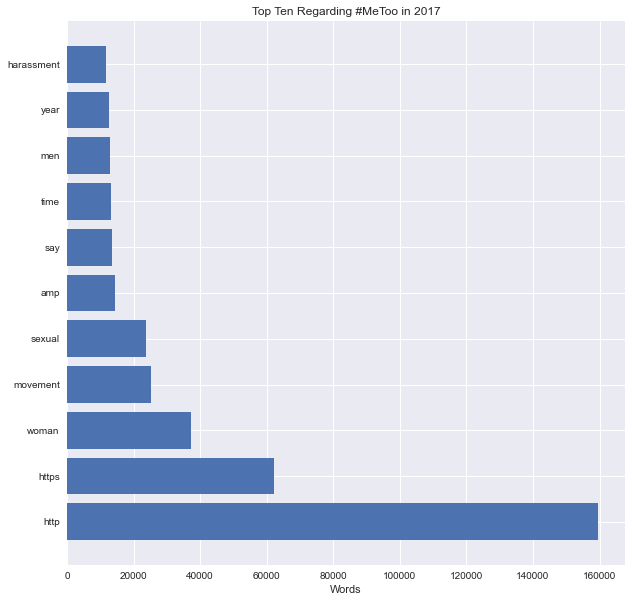

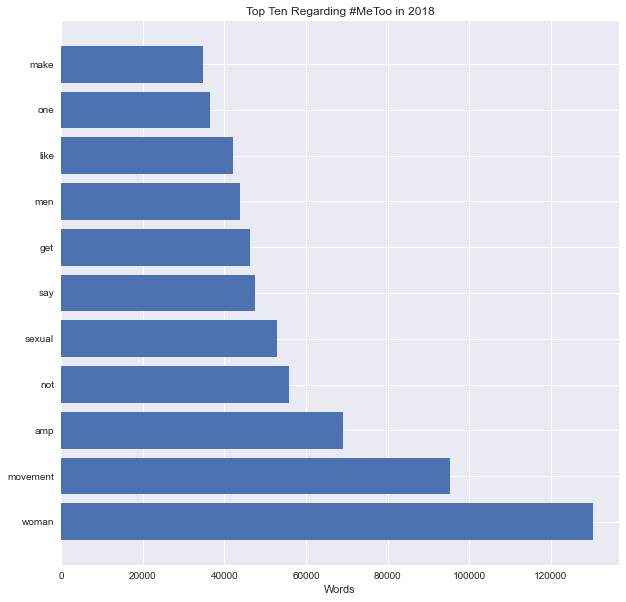

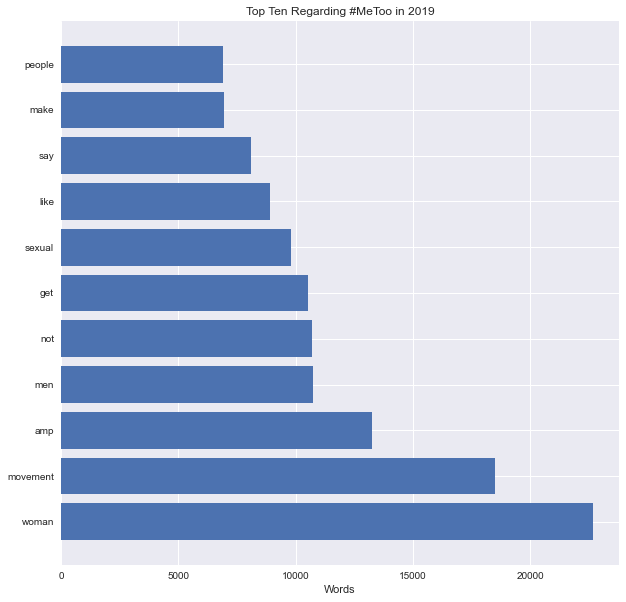

In [53]:
# Plot top ten words in each year
top_10_2017 = token_2017[:11]
fig, ax = plt.subplots(figsize = (10, 10))
plt.style.use('seaborn')
ax.barh(top_10_2017['token'], top_10_2017['token_count']) 
plt.xlabel('Count')
plt.xlabel('Words')
plt.title('Top Ten Regarding #MeToo in 2017')

top_10_2018 = token_2018[:11]
fig, ax = plt.subplots(figsize = (10, 10))
plt.style.use('seaborn')
ax.barh(top_10_2018['token'], top_10_2018['token_count']) 
plt.xlabel('Count')
plt.xlabel('Words')
plt.title('Top Ten Regarding #MeToo in 2018')

top_10_2019 = token_2019[:11]
fig, ax = plt.subplots(figsize = (10, 10))
plt.style.use('seaborn')
ax.barh(top_10_2019['token'], top_10_2019['token_count']) 
plt.xlabel('Count')
plt.xlabel('Words')
plt.title('Top Ten Regarding #MeToo in 2019')